# CapSol Spacing

## Capacity vs Spacing

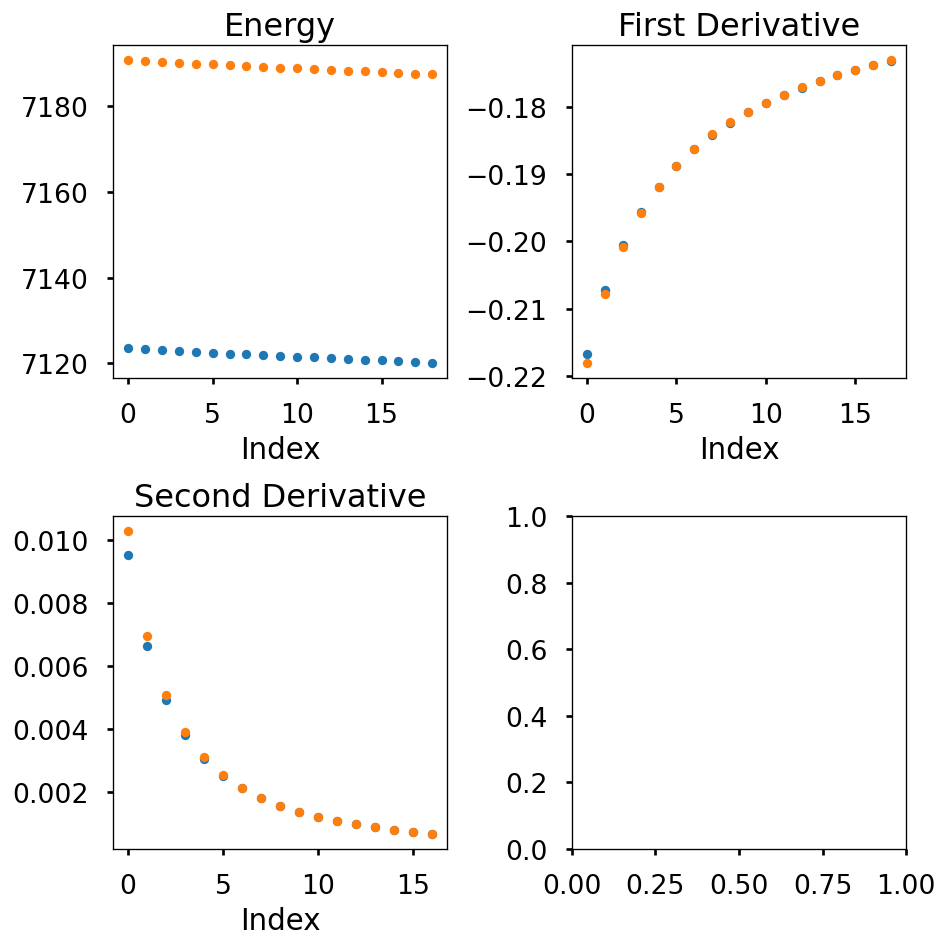

In [113]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

import numpy as np

energy_1 = np.genfromtxt('capsol/grid_500_4/Z-U.dat',skip_header=1)
energy_2 = np.genfromtxt('capsol/grid_1000/Z-U.dat',skip_header=1)

fig,ax = plt.subplots(2,2,figsize=(8,8),dpi=120)
axes = ax.ravel()
axes[0].plot(np.diff(energy_1[:,2],n=0),'.')
axes[0].plot(np.diff(energy_2[:,2],n=0),'.')
axes[0].set_xlabel('Index')
axes[0].set_title('Energy')

axes[1].plot(np.diff(energy_1[:,2],n=1),'.')
axes[1].plot(np.diff(energy_2[:,2],n=1),'.')
axes[1].set_xlabel('Index')
axes[1].set_title('First Derivative')

axes[2].plot(np.diff(energy_1[:,2],n=2),'.')
axes[2].plot(np.diff(energy_2[:,2],n=2),'.')
axes[2].set_xlabel('Index')
axes[2].set_title('Second Derivative')

plt.tight_layout()
plt.show()

## Force vs Spacing

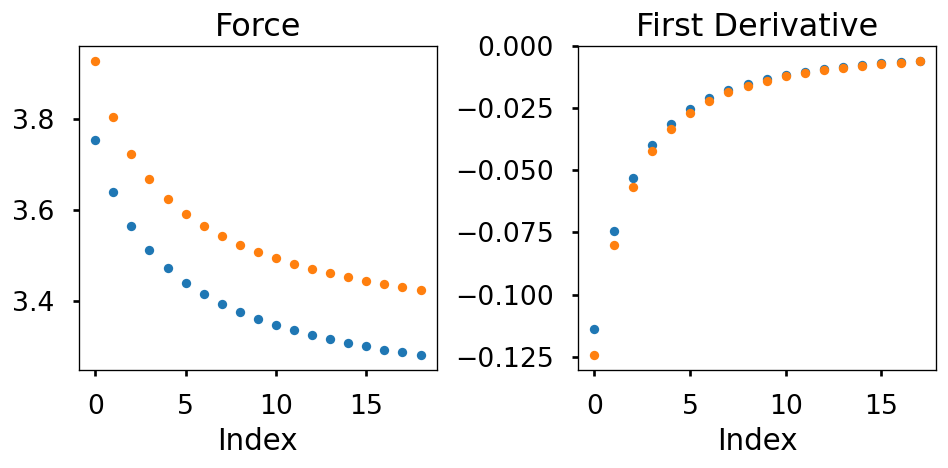

In [116]:
import matplotlib.pyplot as plt
import numpy as np

dir_1 = 'capsol/grid_500_3/'
dir_2 = 'capsol/grid_1000/'

height_gap = np.arange(2,20+1,1) #[nm]
force_1 = [0.0]*len(height_gap)
force_2 = [0.0]*len(height_gap)
for i in range(len(height_gap)):
    s = height_gap[i]/20
    file_name = 'Fz.dat{0:1.4f}'.format(s)
    data = np.genfromtxt(dir_1+file_name,skip_header=1,usecols=(0,3,1))
    force_1[i] = data[-1,-1]
    
    data = np.genfromtxt(dir_2+file_name,skip_header=1,usecols=(0,3,1))
    force_2[i] = data[-1,-1]

fig,ax = plt.subplots(1,2,figsize=(8,4),dpi=120)
axes = ax.ravel()
# ax.plot(offset_tip,force,'.')
# ax.plot(offset_tip,force2,'.')
# ax.plot(offset_tip,force3,'.')
axes[0].plot(np.diff(force_1,n=0),'.')
axes[0].plot(np.diff(force_2,n=0),'.')
axes[0].set_xlabel('Index')
axes[0].set_title('Force')

axes[1].plot(np.diff(force_1,n=1),'.')
axes[1].plot(np.diff(force_2,n=1),'.')
axes[1].set_xlabel('Index')
axes[1].set_title('First Derivative')


plt.tight_layout()
plt.show()

# Probe Geometry

## Benchmark for coarse grid

In [1]:
%load_ext autoreload
%autoreload 2

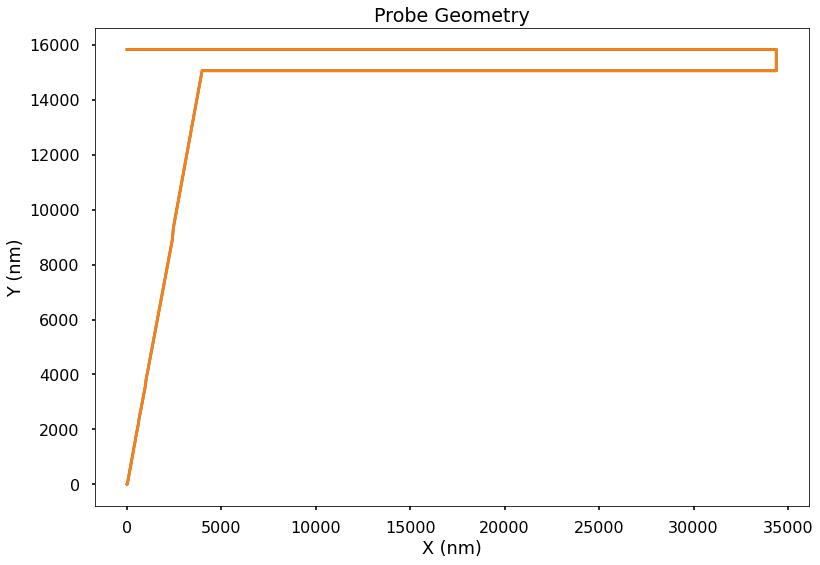

In [38]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

import numpy as np
from lib.mesh import generate_grid,setup_probe

inparg = {'n':500,'m':500,'l_js':350, #number of grids: x,z+,z- below sample top
          'h0':1,'rho_max':10e6,'z_max':10e6, #resolution: h0, box_size (rho_max,z_max)
          'd_min':2,'d_max':20,'id_step':2, #tip-sample separation: min,max,istep (stepsize=istep*h0)
          'eps_r':5.9,'Hsam':10e6} #sample: eps_r, thickness_sample
x,y = generate_grid(**inparg)
f_out = setup_probe(x,y)

geom = np.genfromtxt('capsol/grid_500_4/ProbeGeometry.dat',skip_header=1)
fig,ax = plt.subplots()
ax.plot(geom[:,0],geom[:,1],'-')
ax.plot(f_out[:,0],f_out[:,1],'-')
ax.set_xlabel('X (nm)')
ax.set_ylabel('Y (nm)')
ax.set_title('Probe Geometry')
plt.show()

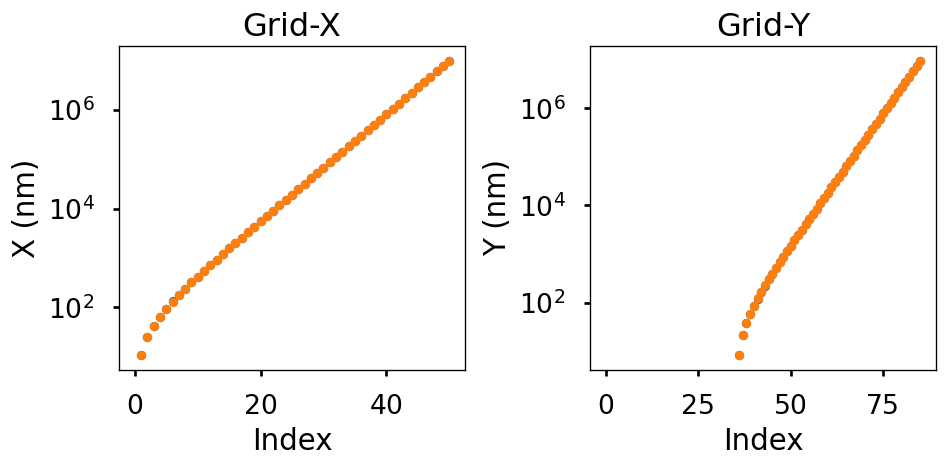

In [39]:
d_in = np.genfromtxt('capsol/grid_500_4/fort.100200',skip_header=1)
r = np.reshape(d_in[:,0],(501,-1))[:,0]
z = np.reshape(d_in[:,1],(501,-1))[0,:]

fig,ax = plt.subplots(1,2,figsize=(8,4),dpi=120)
axes = ax.ravel()
axes[0].plot(r[::10],'.')
axes[0].plot(x[::10],'.')
axes[0].set_yscale('log')
axes[0].set_xlabel('Index')
axes[0].set_ylabel('X (nm)')
axes[0].set_title('Grid-X')

axes[1].plot(z[::10],'.')
axes[1].plot(y[::10],'.')
axes[1].set_yscale('log')
axes[1].set_xlabel('Index')
axes[1].set_ylabel('Y (nm)')
axes[1].set_title('Grid-Y')

plt.tight_layout()
plt.show()

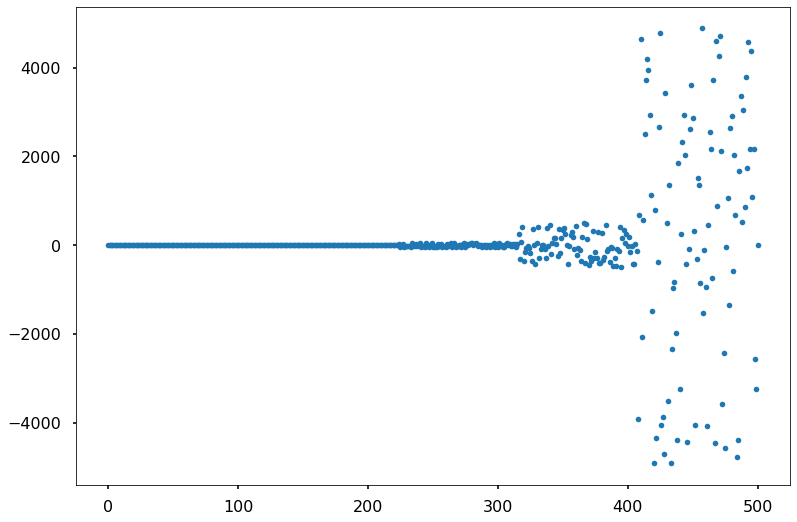

In [43]:
fig,ax = plt.subplots()
ax.plot(r-x,'.')

## Benchmark for fine grid

In [ ]:
%load_ext autoreload
%autoreload 2

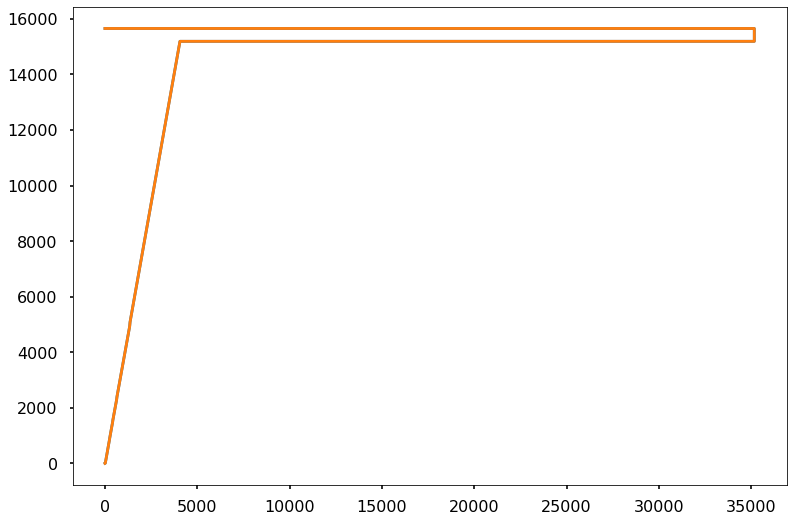

In [106]:
import matplotlib.pyplot as plt
import numpy as np
from lib.mesh import generate_grid,setup_probe

inparg = {'n':1000,'m':1000,'l_js':700, #number of grids: x,z+,z- below sample top
          'h0':0.05,'rho_max':10e6,'z_max':10e6, #resolution: h0, box_size (rho_max,z_max)
          'd_min':20,'d_max':20,'id_step':10, #tip-sample separation: min,max,istep (stepsize=istep*h0)
          'eps_r':5.9,'Hsam':10e6} #sample: eps_r, thickness_sample
x,y = generate_grid(**inparg)
f_out = setup_probe(x,y)

geom = np.genfromtxt('capsol/grid_1000/ProbeGeometry.dat',skip_header=1)
fig,ax = plt.subplots()
ax.plot(geom[:,0],geom[:,1],'-')
ax.plot(f_out[:,0],f_out[:,1],'-')


# TetGen Mesh

## Generate mesh

In [231]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [174]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

import numpy as np
from lib.mesh import generate_grid,Probe

inparg = {'n':500,'m':500,'l_js':350, #number of grids: x,z+,z- below sample top
          'h0':1,'rho_max':10e6,'z_max':10e6, #resolution: h0, box_size (rho_max,z_max)
          'd_min':2,'d_max':20,'id_step':1, #tip-sample separation: min,max,istep (stepsize=istep*h0)
          'eps_r':5.9,'Hsam':10e6} #sample: eps_r, thickness_sample
x,y = generate_grid(**inparg)

mesh_prefix = 'capsol/test3'
height_water = 1.0 #[nm]
height_gap = 20.0 #[nm]

probe = Probe(
    #geometry of the background slab
    radius_air = 50e3, #radius of the air
    height_air = 50e3, #height of the air
    height_gap = height_gap, #gap between tip apex and sample surface [nm]
    height_water = height_water, #thickness of thin water film
    height_solid = 50e3, #height of the solid

    #geometry of the cantilever probe
    radius_tip = 20, #radius of probe tip [nm]
    radius_cone = 15e3*np.tan(15/180*np.pi)+20, #radius of probe cone [nm]
    height_cone = 15e3+20, #height of probe cone [nm]
    radius_disk = 35e3, #radius of probe disk [nm]
    height_disk = 0.5e3, #height of probe disk [nm]

    #area constraints
    area_air = 1e8, #[nm]**2
    area_water = 1e6, #[nm]**2
    area_solid = 1e8, #[nm]**2

    #mesh construction parameters
    mesh_prefix = mesh_prefix,
    mesh_grid = [x,y],
    dist_factor = 1.0,
    build_mesh = True,
    )

# probe.triplot(xunit='nm',yunit='nm')
print('Done')

Writing capsol/test3.poly

Opening capsol/test3.poly.
Constructing Delaunay triangulation by divide-and-conquer method.
Delaunay milliseconds:  370
Recovering segments in Delaunay triangulation.
Segment milliseconds:  7
Removing unwanted triangles.
Spreading regional attributes and area constraints.
Hole milliseconds:  35
Adding Steiner points to enforce quality.
Quality milliseconds:  1780

Writing capsol/test3.1.node.
Writing capsol/test3.1.ele.
Writing capsol/test3.1.poly.
Writing capsol/test3.1.edge.
Writing capsol/test3.1.neigh.

Output milliseconds:  6014
Total running milliseconds:  8323

Statistics:

  Input vertices: 142560
  Input segments: 2683
  Input holes: 1

  Mesh vertices: 615828
  Mesh triangles: 1226236
  Mesh edges: 1842063
  Mesh exterior boundary edges: 5418
  Mesh interior boundary edges: 51007
  Mesh subsegments (constrained edges): 56425

Done


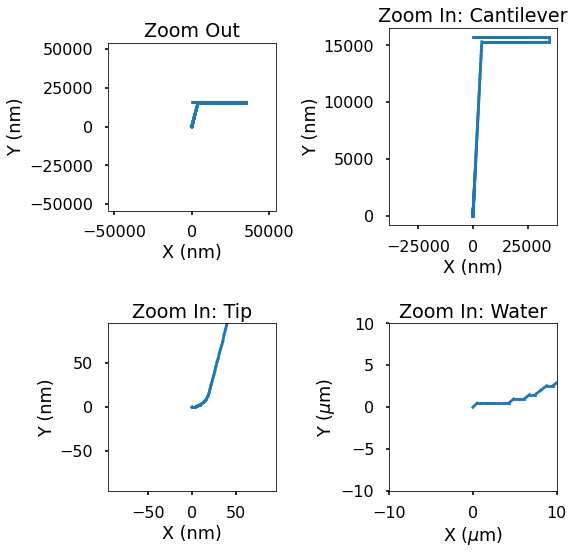

In [109]:
probe.visualize(cpt_flags='none',seg_flags=[3],xunit='nm',yunit='nm')

Reading capsol/test3.1.node
Reading capsol/test3.1.ele
Reading capsol/test3.1.edge
THE NUMBER OF NODES IS: 1059822
THE NUMBER OF ELEMENTS IS: 2065109
THE NUMBER OF EDGES IS: 3100835
node_flags [ 0  1  2  3  4 11 12 14]
elem_flags [1 2 3]
edge_flags [ 0  1  2  3  4 11 12 14]



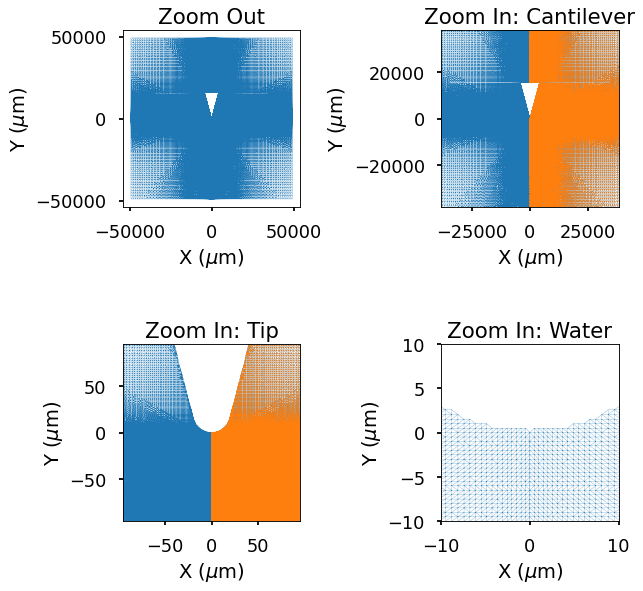

In [110]:
probe.triplot(xunit='nm',yunit='nm')

## Run simulation

In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

import numpy as np
from lib.mesh import Mesh,Probe,generate_grid
from lib.materials import Consts,PDE
from lib.assembly import FEM
from lib.utils import print_tstamp

height_gap = np.arange(2,20+1,1)
stat = FEM.load('capsol/test3_s2.0nm')
for i in range(1):
    f_name = 'fort.{0:.0f}00'.format(1e3+height_gap[i])
    print(f_name)
    d_in = np.genfromtxt('capsol/grid_500_4/'+f_name)
    print('Done')

fort.100200
Done


/tmp/ipykernel_1903192/2677442879.py:19: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  axes[0].set_xlim([0,max(stat.mesh.nodes[:,0])])


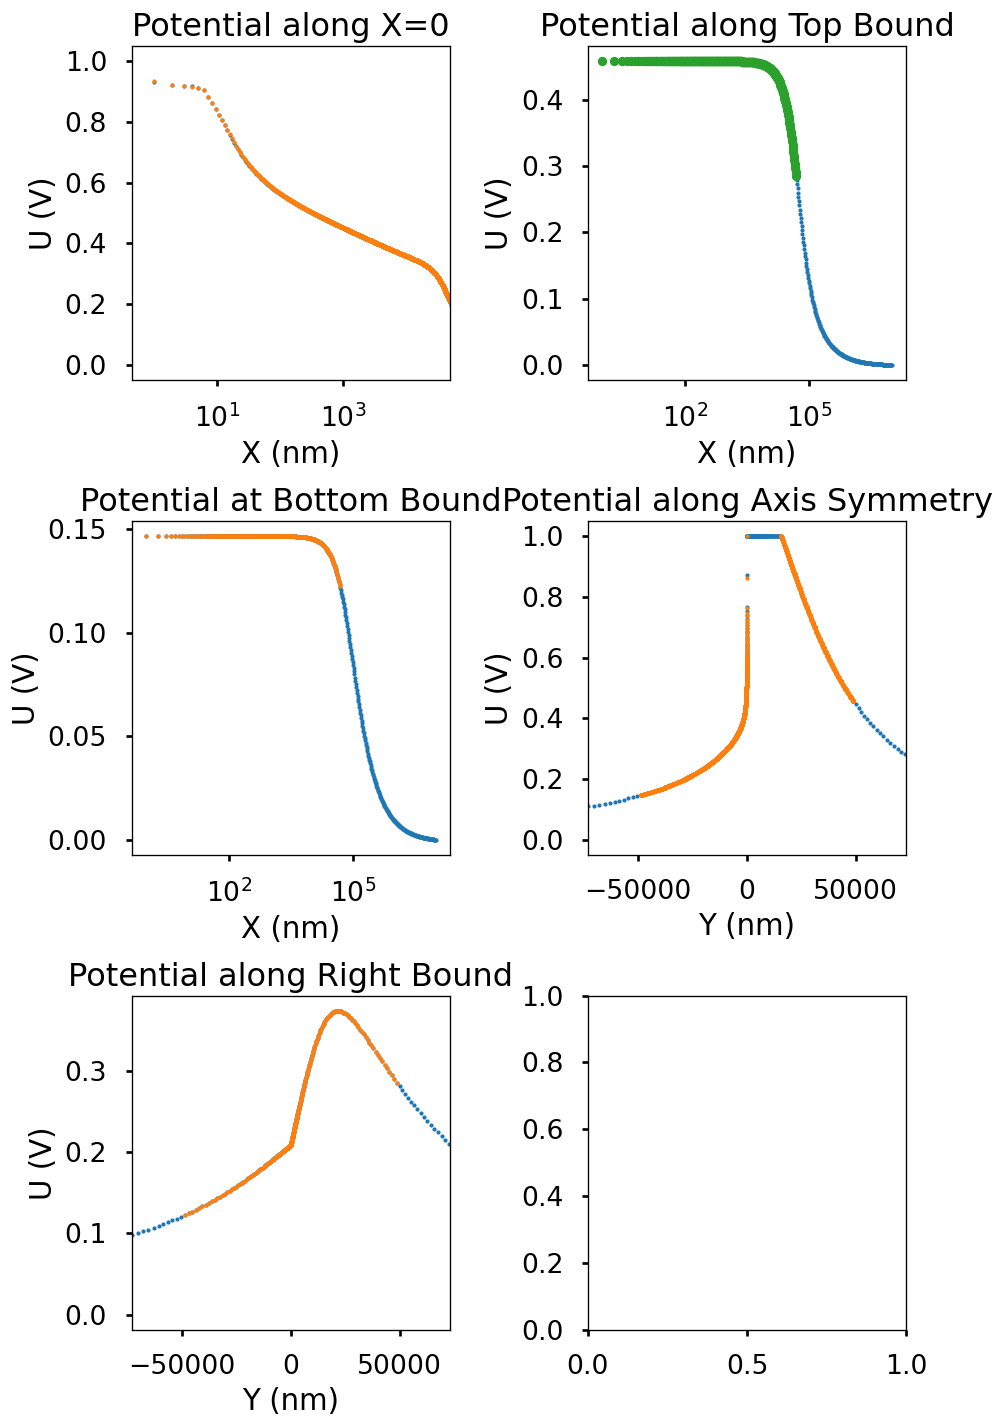

In [5]:
from scipy.interpolate import interp1d
for i in range(1):
    r = np.reshape(d_in[:,0],(501,-1))[:,0]
    z = np.reshape(d_in[:,1],(501,-1))[0,:]

    fig,ax = plt.subplots(3,2,figsize=(8,12),dpi=120)
    axes = ax.flatten()

    #profile along Y = 0
    z_ind = np.argmin(abs(z-0.0))
    axes[0].plot(d_in[z_ind::len(z),0],d_in[z_ind::len(z),2],'.',markersize=5)

    mask = (stat.mesh.nodes[:,1]==0)&(~stat.mesh.is_on_outside_domain)
    axes[0].plot(stat.mesh.nodes[mask,0],stat.sol[mask],'.',markersize=5)

    axes[0].set_xlabel('X (nm)')
    axes[0].set_ylabel('U (V)')
    axes[0].set_xscale('log')
    axes[0].set_xlim([0,max(stat.mesh.nodes[:,0])])
    axes[0].set_title('Potential along X=0')

    #profile at the top of the tetgen mesh
    z_ind = np.argmin(abs(z-max(stat.mesh.nodes[:,1])))
    pot_top = d_in[z_ind::len(z),2]
    axes[1].plot(d_in[z_ind::len(z),0],d_in[z_ind::len(z),2],'.',markersize=5)

    mask = (stat.mesh.is_on_top_bound)&(~stat.mesh.is_on_outside_domain)
    axes[1].plot(stat.mesh.nodes[mask,0],stat.sol[mask],'.',markersize=5)

    axes[1].set_xlabel('X (nm)')
    axes[1].set_ylabel('U (V)')
    axes[1].set_xscale('log')
    #axes[1].set_xlim([0,max(stat.mesh.nodes[:,0])*1.5])
    axes[1].set_title('Potential along Top Bound')
    
    #profile at bottom of the tetgen mesh
    z_ind = np.argmin(abs(z-min(stat.mesh.nodes[:,1])))
    pot_bot = d_in[z_ind::len(z),2]
    axes[2].plot(d_in[z_ind::len(z),0],d_in[z_ind::len(z),2],'.',markersize=5)

    mask = (stat.mesh.is_on_bottom_bound)&(~stat.mesh.is_on_outside_domain)
    axes[2].plot(stat.mesh.nodes[mask,0],stat.sol[mask],'.',markersize=5)

    axes[2].set_xlabel('X (nm)')
    axes[2].set_ylabel('U (V)')
    axes[2].set_xscale('log')
    #axes[2].set_xlim([0,max(stat.mesh.nodes[:,0])*1.5])
    axes[2].set_title('Potential at Bottom Bound')

    #profile at the right of the tetgen mesh
    r_ind = 0
    axes[3].plot(d_in[r_ind*len(z):r_ind*len(z)+len(z),1],
                 d_in[r_ind*len(z):r_ind*len(z)+len(z),2],'.',markersize=5)

    mask = (stat.mesh.is_on_axis_symmetry)&(~stat.mesh.is_on_outside_domain)
    axes[3].plot(stat.mesh.nodes[mask,1],stat.sol[mask],'.',markersize=5)

    axes[3].set_xlabel('Y (nm)')
    axes[3].set_ylabel('U (V)')
    axes[3].set_xlim([min(stat.mesh.nodes[:,1])*1.5,max(stat.mesh.nodes[:,1])*1.5])
    #axes[3].set_xlim([-200,200])
    axes[3].set_title('Potential along Axis Symmetry')
    
    r_ind = np.argmin(abs(r-max(stat.mesh.nodes[:,0])))
    pot_rs = d_in[r_ind*len(z):r_ind*len(z)+len(z),2]
    axes[4].plot(d_in[r_ind*len(z):r_ind*len(z)+len(z),1],
                 d_in[r_ind*len(z):r_ind*len(z)+len(z),2],'.',markersize=5)

    mask = (stat.mesh.is_on_right_bound)&(~stat.mesh.is_on_outside_domain)
    axes[4].plot(stat.mesh.nodes[mask,1],stat.sol[mask],'.',markersize=5)

    axes[4].set_xlabel('Y (nm)')
    axes[4].set_ylabel('U (V)')
    axes[4].set_xlim([min(stat.mesh.nodes[:,1])*1.5,max(stat.mesh.nodes[:,1])*1.5])
    axes[4].set_title('Potential along Right Bound')

    #check interpolation
    def build_s_top(x,y,*args):
        return interp1d(r,pot_top)(x)

    def build_s_bot(x,y,*args):
        return interp1d(r,pot_bot)(x)

    def build_s_rs(x,y,*args):
        return interp1d(z,pot_rs)(y)

    mask = stat.mesh.is_on_top_bound
    x = stat.mesh.nodes[mask,0]
    axes[1].plot(x,build_s_top(x,[]),'.')

    plt.tight_layout()
    plt.show()

## Compute force in float64

In [1]:
%load_ext autoreload
%autoreload 2

In [80]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

import numpy as np
from lib.mesh import Mesh,Probe,generate_grid
from lib.materials import Consts,PDE
from lib.assembly import FEM
from lib.utils import print_tstamp

height_gap = np.arange(2,21,1)
force = np.zeros(len(height_gap))
# for i in range(len(height_gap)):
for i in range(1):
    mesh_prefix = 'capsol/test4_s{:02.1f}nm'.format(height_gap[i])
    print(mesh_prefix)
    stat = FEM.load(mesh_prefix)
#     #f_in = np.genfromtxt('capsol/grid_500_4/Fz.dat0.1000',skip_header=1,usecols=(0,3,2))
#     grad = stat.mesh.grad2d(stat.sol)
#     f_out = stat.mesh.force2d(grad[:,-2],grad[:,-1])
#     force[i] = np.sum(f_out[f_out[:,2]>0,2])
#     print(i,np.sum(f_out[f_out[:,2]>0,2]))

# #     fig,ax = plt.subplots()
# #     mask = f_out[:,-1]>=0
# #     ax.plot(f_out[mask,0],f_out[mask,1],'.')
# #     mask = f_out[:,-1]<0
# #     ax.plot(f_out[mask,0],f_out[mask,1],'.')
# #     ax.plot(f_in[:,0],f_in[:,1],'.')

capsol/test4_s2.0nm


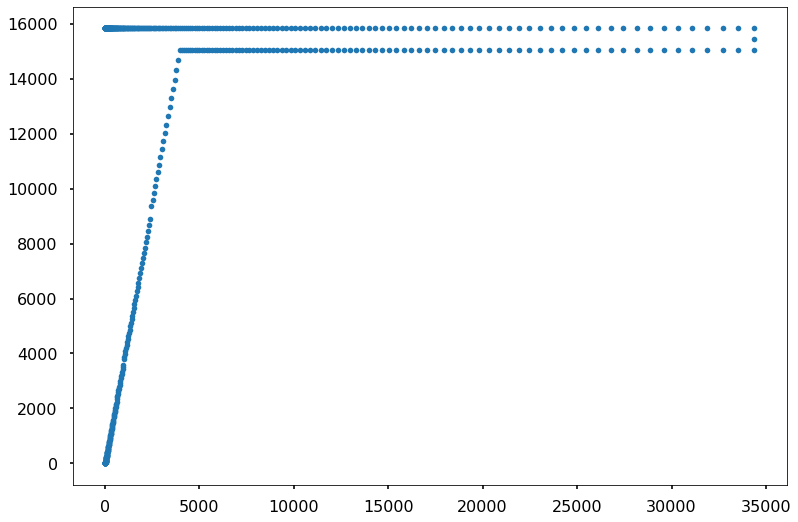

In [83]:
mask = stat.mesh.is_on_equipotential
x = stat.mesh.nodes[mask,0]
y = stat.mesh.nodes[mask,1]

fig,ax = plt.subplots()
ax.plot(x,y,'.')

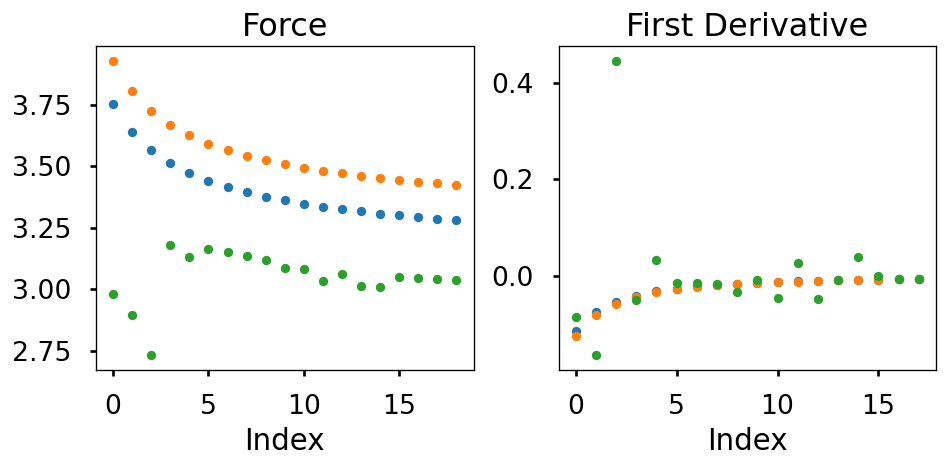

In [5]:
# height_gap = np.arange(2,20+1,1) #[nm]
dir_1 = 'capsol/grid_500_3/'
dir_2 = 'capsol/grid_1000/'

force_1 = [0.0]*len(height_gap)
force_2 = [0.0]*len(height_gap)
for i in range(len(height_gap)):
    s = height_gap[i]/20
    file_name = 'Fz.dat{0:1.4f}'.format(s)
    data = np.genfromtxt(dir_1+file_name,skip_header=1,usecols=(0,3,1))
    force_1[i] = data[-1,-1]
    
    data = np.genfromtxt(dir_2+file_name,skip_header=1,usecols=(0,3,1))
    force_2[i] = data[-1,-1]

fig,ax = plt.subplots(1,2,figsize=(8,4),dpi=120)
axes = ax.ravel()
# ax.plot(offset_tip,force,'.')
# ax.plot(offset_tip,force2,'.')
# ax.plot(offset_tip,force3,'.')
axes[0].plot(np.diff(force_1,n=0),'.')
axes[0].plot(np.diff(force_2,n=0),'.')
axes[0].plot(np.diff(force,n=0),'.')
axes[0].set_xlabel('Index')
axes[0].set_title('Force')

axes[1].plot(np.diff(force_1,n=1),'.')
axes[1].plot(np.diff(force_2,n=1),'.')
axes[1].plot(np.diff(force,n=1),'.')
axes[1].set_xlabel('Index')
axes[1].set_title('First Derivative')

plt.tight_layout()
plt.show()

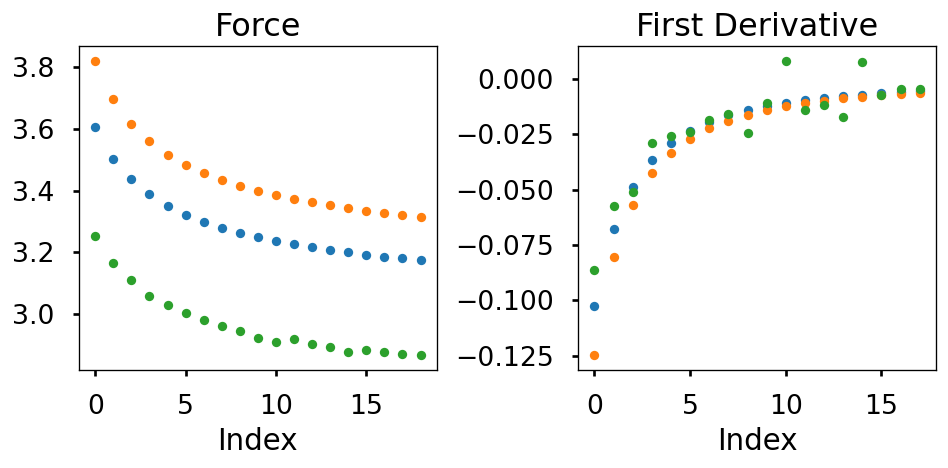

In [124]:
# height_gap = np.arange(2,20+1,1) #[nm]
dir_1 = 'capsol/grid_500_4/'
dir_2 = 'capsol/grid_500/'

force_1 = [0.0]*len(height_gap)
force_2 = [0.0]*len(height_gap)
for i in range(len(height_gap)):
    s = height_gap[i]/20
    file_name = 'Fz.dat{0:1.4f}'.format(s)
    data = np.genfromtxt(dir_1+file_name,skip_header=1,usecols=(0,3,1))
    force_1[i] = data[-1,-1]
    
    data = np.genfromtxt(dir_2+file_name,skip_header=1,usecols=(0,3,1))
    force_2[i] = data[-1,-1]

fig,ax = plt.subplots(1,2,figsize=(8,4),dpi=120)
axes = ax.ravel()
# ax.plot(offset_tip,force,'.')
# ax.plot(offset_tip,force2,'.')
# ax.plot(offset_tip,force3,'.')
axes[0].plot(np.diff(force_1,n=0),'.')
axes[0].plot(np.diff(force_2,n=0),'.')
axes[0].plot(np.diff(force,n=0),'.')
axes[0].set_xlabel('Index')
axes[0].set_title('Force')

axes[1].plot(np.diff(force_1,n=1),'.')
axes[1].plot(np.diff(force_2,n=1),'.')
axes[1].plot(np.diff(force,n=1),'.')
axes[1].set_xlabel('Index')
axes[1].set_title('First Derivative')

plt.tight_layout()
plt.show()

In [42]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

import numpy as np
from lib.mesh import Mesh,Probe,generate_grid
from lib.materials import Consts,PDE
from lib.assembly import FEM
from lib.utils import print_tstamp

height_gap = np.arange(2,21,1)
# force = np.zeros(len(height_gap))
# for i in range(len(height_gap)):
# for i in [len(height_gap)-1]:
for i in range(1):
    mesh_prefix = 'capsol/test4_s{:02.1f}nm'.format(height_gap[i])
    print(mesh_prefix)
    stat = FEM.load(mesh_prefix)
    #f_in = np.genfromtxt('capsol/grid_500_4/Fz.dat0.1000',skip_header=1,usecols=(0,3,2))
    grad = stat.mesh.grad2d(stat.sol)
    f_out = stat.mesh.force2d(grad[:,-2],grad[:,-1])
#     force[i] = np.sum(f_out[f_out[:,-1]>0,-1])
    print(i,np.sum(f_out[f_out[:,2]>0,2]))
    s = height_gap[i]/20
    file_name = 'Fz.dat{0:1.4f}'.format(s)
    print(file_name)
    data = np.genfromtxt('capsol/grid_500_4/'+file_name,skip_header=1)

#     fig,ax = plt.subplots()
#     mask = f_out[:,-1]>=0
#     ax.plot(f_out[mask,0],f_out[mask,1],'.')
#     mask = f_out[:,-1]<0
#     ax.plot(f_out[mask,0],f_out[mask,1],'.')
#     ax.plot(f_in[:,0],f_in[:,1],'.')

capsol/test4_s2.0nm
Computing fields and gradients in elements
Time elapsed  0.15778517723083496 sec

0 2.9813733036670675
Fz.dat0.1000


In [26]:
np.sum(stat.mesh.is_in_probe)

548

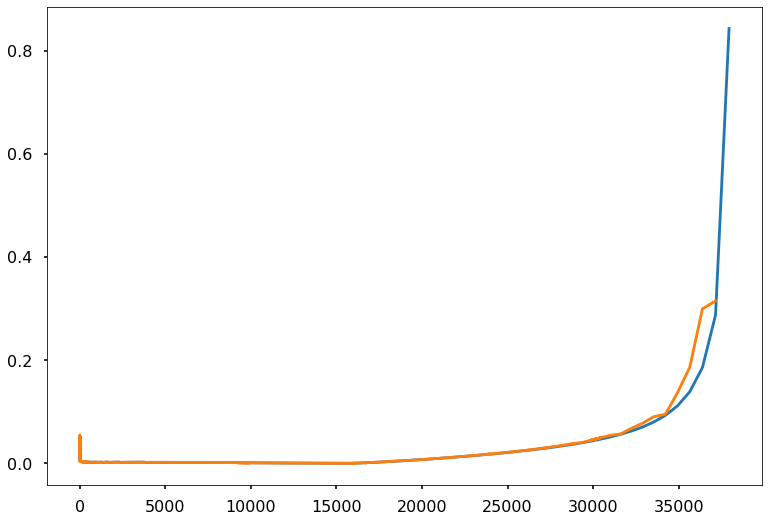

In [46]:
mask = f_out[:,2]>0
fig,ax = plt.subplots()

dist = np.sqrt(data[:,0]**2+data[:,3]**2)
# ax.plot(data[:,0],data[:,4],'.')
ax.plot(dist,data[:,2])

dist = np.sqrt(f_out[:,0]**2+f_out[:,1]**2)
# ax.plot(f_out[mask,0],f_out[mask,3],'.',markersize=10)
# ax.plot(dist[mask],f_out[mask,2],'-')
# ax.plot(f_out[~mask,1],f_out[~mask,3],'.')

# ax.set_xscale('log')
# ax.set_yscale('log')

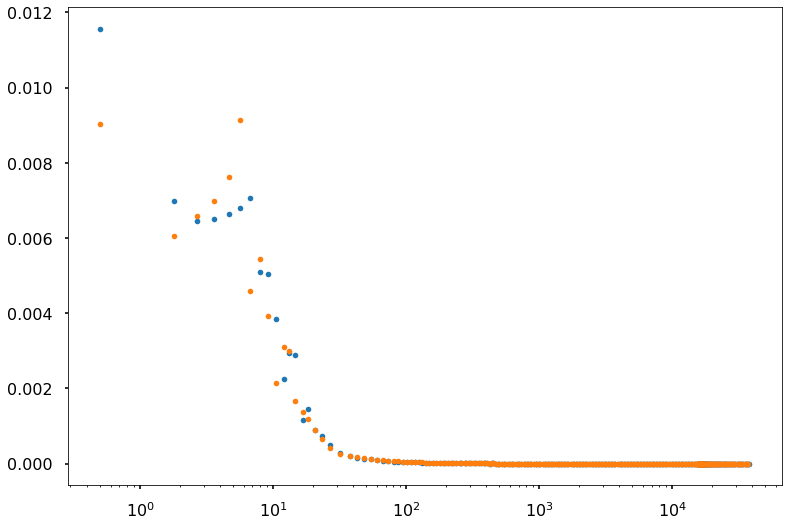

In [35]:
mask = f_out[:,2]>0
fig,ax = plt.subplots()
dist = np.sqrt(data[:,0]**2+data[:,3]**2)
ax.plot(dist,data[:,4],'.')
dist = np.sqrt(f_out[:,0]**2+f_out[:,1]**2)
ax.plot(dist[mask],f_out[mask,3],'.')
# ax.plot(f_out[~mask,1],f_out[~mask,3],'.')
ax.set_xscale('log')
# ax.set_yscale('log')

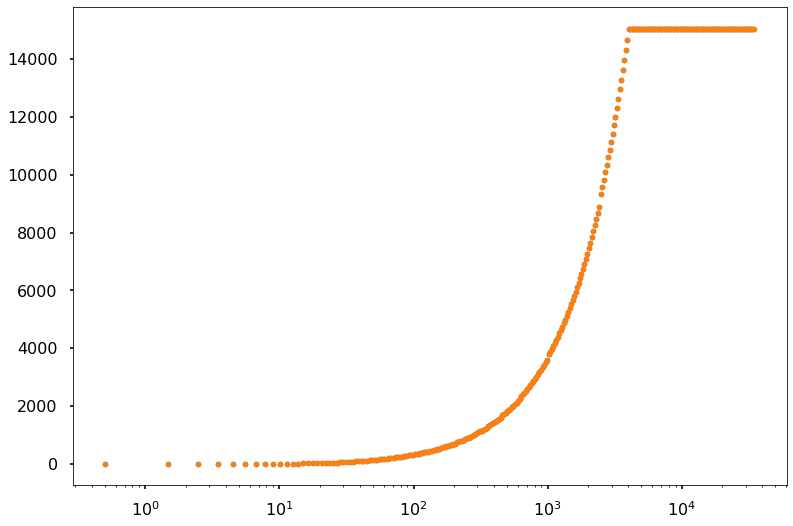

In [37]:
mask = f_out[:,2]>0
fig,ax = plt.subplots()
# ax.plot(f_out[:,0],f_out[:,1],'.')
ax.plot(np.abs(f_out[mask,0]),(f_out[mask,1]),'.')
ax.plot(data[:,0],data[:,3],'.')
ax.set_xscale('log')

In [22]:
print(np.sum(stat.mesh.is_in_probe))
print(np.sum(stat.mesh.is_with_equipotential))

548
548


In [23]:
tmp = np.genfromtxt('capsol/grid_500_4/ProbeGeometry.dat',skip_header=1)
print(len(tmp))

546


In [24]:
tmp2 = np.genfromtxt('probe.out',skip_header=1)
print(len(tmp2))

548


In [195]:
#CapSol Grid
inparg = {'n':500,'m':500,'l_js':350, #number of grids: x,z+,z- below sample top
          'h0':1,'rho_max':10e6,'z_max':10e6, #resolution: h0, box_size (rho_max,z_max)
          'd_min':2,'d_max':20,'id_step':1, #tip-sample separation: min,max,istep (stepsize=istep*h0)
          'eps_r':5.9,'Hsam':10e6} #sample: eps_r, thickness_sample
x,y = generate_grid(**inparg)

#Probe Geometry
probe = Probe(
    #geometry of the background slab
    radius_air = 10e6, #radius of the air
    height_air = 10e6, #height of the air
    height_gap = 20.0, #gap between tip apex and sample surface [nm]
    height_water = 1.0, #thickness of thin water film
    height_solid = 10e6, #height of the solid

    #geometry of the cantilever probe
    radius_tip = 20, #radius of probe tip [nm]
    radius_cone = 15e3*np.tan(15/180*np.pi)+20, #radius of probe cone [nm]
    height_cone = 15e3+20, #height of probe cone [nm]
    radius_disk = 35e3, #radius of probe disk [nm]
    height_disk = 0.5e3, #height of probe disk [nm]

    #area constraints
    area_air = 1e12, #[nm]**2
    area_water = 1e12, #[nm]**2
    area_solid = 1e12, #[nm]**2

    #mesh construction parameters
    mesh_prefix = 'test',
    mesh_grid = [x,y],
    dist_factor = 1.0,
    build_mesh = False,
    )

height_gap = np.arange(2,20+1,1)

# for i in range(len(height_gap)):
# for i in range(1,len(height_gap)):
for i in range(1):
    mesh_prefix = 'capsol/test4_s{:02.1f}nm'.format(height_gap[i])
    #print(mesh_prefix)

    #update grid discretization
    inparg['d_min'] = height_gap[i]
    x,y = generate_grid(**inparg)

    #update probe geometry and control points
    probe.height_gap = height_gap[i]
    probe.mesh_prefix = mesh_prefix
    probe.mesh_grid = [x,y]
    probe.build_mesh = True
    probe.build()


Writing capsol/test4_s2.0nm.poly

Opening capsol/test4_s2.0nm.poly.
Constructing Delaunay triangulation by divide-and-conquer method.
Delaunay milliseconds:  1105
Recovering segments in Delaunay triangulation.
Segment milliseconds:  18
Removing unwanted triangles.
Spreading regional attributes and area constraints.
Hole milliseconds:  106
Adding Steiner points to enforce quality.
Quality milliseconds:  31

Writing capsol/test4_s2.0nm.1.node.
Writing capsol/test4_s2.0nm.1.ele.
Writing capsol/test4_s2.0nm.1.poly.
Writing capsol/test4_s2.0nm.1.edge.
Writing capsol/test4_s2.0nm.1.neigh.

Output milliseconds:  3824
Total running milliseconds:  5490

Statistics:

  Input vertices: 425500
  Input segments: 4243
  Input holes: 1

  Mesh vertices: 405142
  Mesh triangles: 807278
  Mesh edges: 1212419
  Mesh exterior boundary edges: 3004
  Mesh interior boundary edges: 998
  Mesh subsegments (constrained edges): 4002



In [196]:
for i in range(1):
    #import mesh
    mesh = Mesh(
        prefix = mesh_prefix,
        axis_symmetry = 'Y',
        unscale_factor = 1.0,
        )


Reading capsol/test4_s2.0nm.1.node
Reading capsol/test4_s2.0nm.1.ele
Reading capsol/test4_s2.0nm.1.edge
THE NUMBER OF NODES IS: 425500
THE NUMBER OF ELEMENTS IS: 807278
THE NUMBER OF EDGES IS: 1212419
node_flags [ 0  1  2  3  4 11 12 14]
elem_flags [1 2 3]
edge_flags [ 0  1  2  3  4 11 12 14]

Computing shape functions of triangular elements
This will take a minute
Time elapsed  27.58278799057007 sec

Computing shape functions of line segments
This will take a minute
Time elapsed  0.25729894638061523 sec



In [198]:
np.sum(mesh.is_on_equipotential)

549

In [202]:
mask = probe.segs[:,-1]==3
print(np.sum(mask))

547


## Visualize mesh

In [58]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

import numpy as np
from lib.mesh import Mesh,Probe,generate_grid
from lib.materials import Consts,PDE
from lib.assembly import FEM
from lib.utils import print_tstamp

height_gap = np.arange(2,20+1,1)
stat = FEM.load('capsol/test4_s2.0nm')
for i in range(1):
    f_name = 'fort.{0:.0f}00'.format(1e3+height_gap[i])
    print(f_name)
    d_in = np.genfromtxt('capsol/grid_500_4/'+f_name)
    print('Done')

fort.100200
Done


In [59]:
from scipy.interpolate import interp1d
for i in range(1):
    r = np.reshape(d_in[:,0],(501,-1))[:,0]
    z = np.reshape(d_in[:,1],(501,-1))[0,:]

#     fig,ax = plt.subplots(3,2,figsize=(8,12),dpi=120)
#     axes = ax.flatten()

#     #profile along Y = 0
#     z_ind = np.argmin(abs(z-0.0))
#     axes[0].plot(d_in[z_ind::len(z),0],d_in[z_ind::len(z),2],'.',markersize=5)

#     mask = (stat.mesh.nodes[:,1]==0)&(~stat.mesh.is_on_outside_domain)
#     axes[0].plot(stat.mesh.nodes[mask,0],stat.sol[mask],'.',markersize=5)

#     axes[0].set_xlabel('X (nm)')
#     axes[0].set_ylabel('U (V)')
#     axes[0].set_xscale('log')
#     axes[0].set_xlim([0,max(stat.mesh.nodes[:,0])])
#     axes[0].set_title('Potential along X=0')

#     #profile at the top of the tetgen mesh
#     z_ind = np.argmin(abs(z-max(stat.mesh.nodes[:,1])))
#     pot_top = d_in[z_ind::len(z),2]
#     axes[1].plot(d_in[z_ind::len(z),0],d_in[z_ind::len(z),2],'.',markersize=5)

#     mask = (stat.mesh.is_on_top_bound)&(~stat.mesh.is_on_outside_domain)
#     axes[1].plot(stat.mesh.nodes[mask,0],stat.sol[mask],'.',markersize=5)

#     axes[1].set_xlabel('X (nm)')
#     axes[1].set_ylabel('U (V)')
#     axes[1].set_xscale('log')
#     #axes[1].set_xlim([0,max(stat.mesh.nodes[:,0])*1.5])
#     axes[1].set_title('Potential along Top Bound')
    
#     #profile at bottom of the tetgen mesh
#     z_ind = np.argmin(abs(z-min(stat.mesh.nodes[:,1])))
#     pot_bot = d_in[z_ind::len(z),2]
#     axes[2].plot(d_in[z_ind::len(z),0],d_in[z_ind::len(z),2],'.',markersize=5)

#     mask = (stat.mesh.is_on_bottom_bound)&(~stat.mesh.is_on_outside_domain)
#     axes[2].plot(stat.mesh.nodes[mask,0],stat.sol[mask],'.',markersize=5)

#     axes[2].set_xlabel('X (nm)')
#     axes[2].set_ylabel('U (V)')
#     axes[2].set_xscale('log')
#     #axes[2].set_xlim([0,max(stat.mesh.nodes[:,0])*1.5])
#     axes[2].set_title('Potential at Bottom Bound')

#     #profile at the right of the tetgen mesh
#     r_ind = 0
#     axes[3].plot(d_in[r_ind*len(z):r_ind*len(z)+len(z),1],
#                  d_in[r_ind*len(z):r_ind*len(z)+len(z),2],'.',markersize=5)

#     mask = (stat.mesh.is_on_axis_symmetry)&(~stat.mesh.is_on_outside_domain)
#     axes[3].plot(stat.mesh.nodes[mask,1],stat.sol[mask],'.',markersize=5)

#     axes[3].set_xlabel('Y (nm)')
#     axes[3].set_ylabel('U (V)')
#     axes[3].set_xlim([min(stat.mesh.nodes[:,1])*1.5,max(stat.mesh.nodes[:,1])*1.5])
#     #axes[3].set_xlim([-200,200])
#     axes[3].set_title('Potential along Axis Symmetry')
    
#     r_ind = np.argmin(abs(r-max(stat.mesh.nodes[:,0])))
#     pot_rs = d_in[r_ind*len(z):r_ind*len(z)+len(z),2]
#     axes[4].plot(d_in[r_ind*len(z):r_ind*len(z)+len(z),1],
#                  d_in[r_ind*len(z):r_ind*len(z)+len(z),2],'.',markersize=5)

#     mask = (stat.mesh.is_on_right_bound)&(~stat.mesh.is_on_outside_domain)
#     axes[4].plot(stat.mesh.nodes[mask,1],stat.sol[mask],'.',markersize=5)

#     axes[4].set_xlabel('Y (nm)')
#     axes[4].set_ylabel('U (V)')
#     axes[4].set_xlim([min(stat.mesh.nodes[:,1])*1.5,max(stat.mesh.nodes[:,1])*1.5])
#     axes[4].set_title('Potential along Right Bound')

#     #check interpolation
#     def build_s_top(x,y,*args):
#         return interp1d(r,pot_top)(x)

#     def build_s_bot(x,y,*args):
#         return interp1d(r,pot_bot)(x)

#     def build_s_rs(x,y,*args):
#         return interp1d(z,pot_rs)(y)

#     mask = stat.mesh.is_on_top_bound
#     x = stat.mesh.nodes[mask,0]
#     axes[1].plot(x,build_s_top(x,[]),'.')

#     plt.tight_layout()
#     plt.show()

In [49]:
import numpy as np
from scipy.interpolate import interp1d

from lib.mesh import Mesh,Probe,generate_grid
from lib.materials import Consts,PDE
from lib.assembly import FEM
from lib.utils import print_tstamp

#===============================================================================
#CapSol Grid
inparg = {'n':500,'m':500,'l_js':350, #number of grids: x,z+,z- below sample top
          'h0':1,'rho_max':10e6,'z_max':10e6, #resolution: h0, box_size (rho_max,z_max)
          'd_min':2,'d_max':20,'id_step':1, #tip-sample separation: min,max,istep (stepsize=istep*h0)
          'eps_r':5.9,'Hsam':10e6} #sample: eps_r, thickness_sample
x,y = generate_grid(**inparg)

#Probe Geometry
probe = Probe(
    #geometry of the background slab
    radius_air = 10e6, #radius of the air
    height_air = 10e6, #height of the air
    height_gap = 20.0, #gap between tip apex and sample surface [nm]
    height_water = 1.0, #thickness of thin water film
    height_solid = 10e6, #height of the solid

    #geometry of the cantilever probe
    radius_tip = 20, #radius of probe tip [nm]
    radius_cone = 15e3*np.tan(15/180*np.pi)+20, #radius of probe cone [nm]
    height_cone = 15e3+20, #height of probe cone [nm]
    radius_disk = 35e3, #radius of probe disk [nm]
    height_disk = 0.5e3, #height of probe disk [nm]

    #area constraints
    area_air = 1e12, #[nm]**2
    area_water = 1e12, #[nm]**2
    area_solid = 1e12, #[nm]**2

    #mesh construction parameters
    mesh_prefix = 'test',
    mesh_grid = [x,y],
    dist_factor = 1.0,
    build_mesh = False,
    )

# #define PDE
# pde = PDE(
#     c_x = {'is_in_air':[[1.0]],
#            'is_in_water':[[1.0]],
#            'is_in_solid':[[5.9]]},
#     c_y = {'is_in_air':[[1.0]],
#            'is_in_water':[[1.0]],
#            'is_in_solid':[[5.9]]},
#     s_n = {'is_on_inner_bound':[1.0],
#            'is_on_top_bound':[0.0],
#            'is_on_bottom_bound':[0.0],
#            'is_on_right_bound':[0.0],
#            'is_on_outside_domain':[0.0]},
#     )

#===============================================================================
height_gap = np.arange(2,20+1,1)

# for i in range(len(height_gap)):
# for i in range(0,len(height_gap)):
for i in range(1):
    mesh_prefix = 'capsol/test4_s{:02.1f}nm'.format(height_gap[i])
    #print(mesh_prefix)

    #update grid discretization
    inparg['d_min'] = height_gap[i]
    x,y = generate_grid(**inparg)

    #update probe geometry and control points
    probe.height_gap = height_gap[i]
    probe.mesh_prefix = mesh_prefix
    probe.mesh_grid = [x,y]
    probe.build_mesh = False
#     probe.build()
    print('Done')

Done


Reading capsol/test4_s2.0nm.1.node
Reading capsol/test4_s2.0nm.1.ele
Reading capsol/test4_s2.0nm.1.edge
THE NUMBER OF NODES IS: 427353
THE NUMBER OF ELEMENTS IS: 810978
THE NUMBER OF EDGES IS: 1217972
node_flags [ 0  1  2  3  4 11 12 14]
elem_flags [1 2 3]
edge_flags [ 0  1  2  3  4 11 12 14]



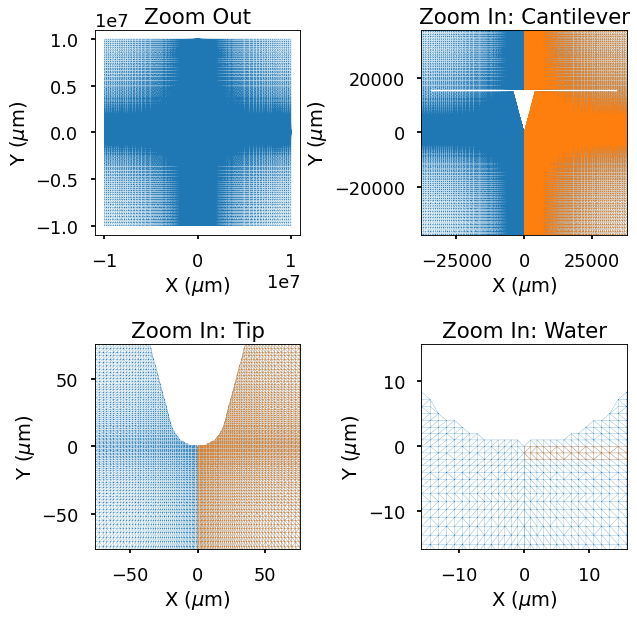

In [50]:
probe.triplot()

# Benchmark

In [ ]:
%load_ext autoreload
%autoreload 2

## Benchmark grid in mesh

In [91]:
import numpy as np
from scipy.interpolate import interp1d

from lib.mesh import Mesh,Probe,generate_grid
from lib.materials import Consts,PDE
from lib.assembly import FEM
from lib.utils import print_tstamp

#===============================================================================
#CapSol Grid
inparg = {'n':500,'m':500,'l_js':350, #number of grids: x,z+,z- below sample top
          'h0':1,'rho_max':10e6,'z_max':10e6, #resolution: h0, box_size (rho_max,z_max)
          'd_min':2,'d_max':20,'id_step':1, #tip-sample separation: min,max,istep (stepsize=istep*h0)
          'eps_r':5.9,'Hsam':10e6} #sample: eps_r, thickness_sample
x,y = generate_grid(**inparg)

#Probe Geometry
probe = Probe(
    #geometry of the background slab
    radius_air = 10e6, #radius of the air
    height_air = 10e6, #height of the air
    height_gap = 20.0, #gap between tip apex and sample surface [nm]
    height_water = 1.0, #thickness of thin water film
    height_solid = 10e6, #height of the solid

    #geometry of the cantilever probe
    radius_tip = 20, #radius of probe tip [nm]
    radius_cone = 15e3*np.tan(15/180*np.pi)+20, #radius of probe cone [nm]
    height_cone = 15e3+20, #height of probe cone [nm]
    radius_disk = 35e3, #radius of probe disk [nm]
    height_disk = 0.5e3, #height of probe disk [nm]

    #area constraints
    area_air = 1e12, #[nm]**2
    area_water = 1e12, #[nm]**2
    area_solid = 1e12, #[nm]**2

    #mesh construction parameters
    mesh_prefix = 'none',
    mesh_grid = [x,y],
    dist_factor = 1.0,
    build_mesh = False,
    )

# #define PDE
# pde = PDE(
#     c_x = {'is_in_air':[[1.0]],
#            'is_in_water':[[1.0]],
#            'is_in_solid':[[5.9]]},
#     c_y = {'is_in_air':[[1.0]],
#            'is_in_water':[[1.0]],
#            'is_in_solid':[[5.9]]},
#     s_n = {'is_on_inner_bound':[1.0],
#            'is_on_top_bound':[0.0],
#            'is_on_bottom_bound':[0.0],
#            'is_on_right_bound':[0.0],
#            'is_on_outside_domain':[0.0]},
#     )

#===============================================================================
height_gap = np.arange(2,20+1,1)

# for i in range(len(height_gap)):
# for i in range(0,len(height_gap)):
for i in range(1):
    mesh_prefix = 'capsol/test4_s{:02.1f}nm'.format(height_gap[i])
    print(mesh_prefix)

    #update grid discretization
    inparg['d_min'] = height_gap[i]
    x,y = generate_grid(**inparg)

    #update probe geometry and control points
    probe.height_gap = height_gap[i]
    probe.mesh_prefix = mesh_prefix
    probe.mesh_grid = [x,y]
    #probe.build_mesh = True
    #probe.build()
    
    f_name = 'fort.{0:.0f}00'.format(1e3+height_gap[i])
    print(f_name)
    d_in = np.genfromtxt('capsol/grid_500_4/'+f_name)
    r = np.reshape(d_in[:,0],(501,-1))[:,0]
    z = np.reshape(d_in[:,1],(501,-1))[0,:]
    print('Done')

capsol/test4_s2.0nm
fort.100200
Done


## Benchmark probe in mesh

capsol/test4_s2.0nm


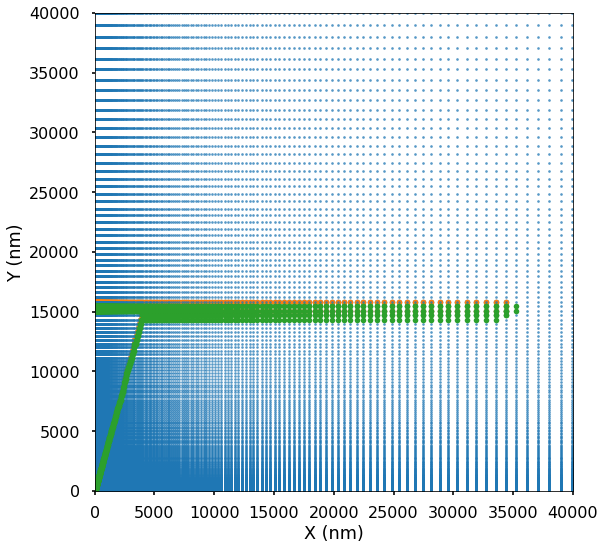

In [156]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

import numpy as np
from lib.mesh import Mesh,Probe,generate_grid
from lib.materials import Consts,PDE
from lib.assembly import FEM
from lib.utils import print_tstamp

height_gap = np.arange(2,21,1)
for i in range(1):
    mesh_prefix = 'capsol/test4_s{:02.1f}nm'.format(height_gap[i])
    print(mesh_prefix)
    if False:
        stat = FEM.load(mesh_prefix)
        grad = stat.mesh.grad2d(stat.sol)

    geom = np.genfromtxt('capsol/grid_500_4/ProbeGeometry.dat')
    fig,ax = plt.subplots()
    ax.plot(geom[:,0],geom[:,1],'.')
    
    mask = stat.mesh.is_on_equipotential
    xp = stat.mesh.nodes[mask,0]
    yp = stat.mesh.nodes[mask,1]
    ax.plot(xp,yp,'.')
    
    xg,yg = np.meshgrid(r,z)
    xg = xg.ravel()
    yg = yg.ravel()
    ax.plot(xg,yg,'.',color='tab:blue',markersize=5,alpha=0.5)
    
    xg,yg = np.meshgrid(x,y)
    xg = xg.ravel()
    yg = yg.ravel()
    ax.plot(xg,yg,'.',color='tab:blue',markersize=5,alpha=0.5)

    #check mesh.is_on_probe
    mask = stat.mesh.is_on_probe[:,1]
    xp = stat.mesh.nodes[mask,0]
    yp = stat.mesh.nodes[mask,1]
    ax.plot(xp,yp,'.',color='tab:green')
    
    mask = stat.mesh.is_on_probe[:,2]
    xp = stat.mesh.nodes[mask,0]
    yp = stat.mesh.nodes[mask,1]
    ax.plot(xp,yp,'.',color='tab:green')
    
    mask = stat.mesh.is_on_probe[:,3]
    xp = stat.mesh.nodes[mask,0]
    yp = stat.mesh.nodes[mask,1]
    ax.plot(xp,yp,'.',color='tab:green')

    ax.set_xlim([-10,40e3])
    ax.set_ylim([-10,40e3])
    ax.set_aspect('equal')
    ax.set_xlabel('X (nm)')
    ax.set_ylabel('Y (nm)')

## Benchmark solution in code

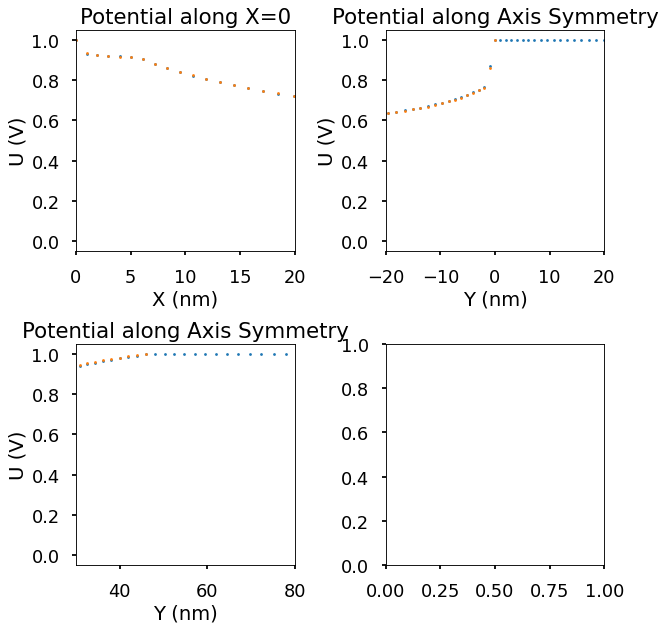

In [134]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

import numpy as np
from lib.mesh import Mesh,Probe,generate_grid
from lib.materials import Consts,PDE
from lib.assembly import FEM
from lib.utils import print_tstamp

height_gap = np.arange(2,20+1,1)
for i in range(1):
#     mesh_prefix = 'capsol/test4_s{:02.1f}nm'.format(height_gap[i])
#     print(mesh_prefix)
#     stat = FEM.load(mesh_prefix)
    
#     f_name = 'fort.{0:.0f}00'.format(1e3+height_gap[i])
#     print(f_name)
#     d_in = np.genfromtxt('capsol/grid_500_4/'+f_name)
#     r = np.reshape(d_in[:,0],(501,-1))[:,0]
#     z = np.reshape(d_in[:,1],(501,-1))[0,:]

    fig,ax = plt.subplots(2,2,figsize=(8,8),dpi=80)
    axes = ax.flatten()

    #profile along Y = 0
    z_ind = np.argmin(abs(z-0.0))
    axes[0].plot(d_in[z_ind::len(z),0],d_in[z_ind::len(z),2],'.',markersize=5)

    mask = (stat.mesh.nodes[:,1]==0)&(~stat.mesh.is_on_outside_domain)
    axes[0].plot(stat.mesh.nodes[mask,0],stat.sol[mask],'.',markersize=5)

    axes[0].set_xlabel('X (nm)')
    axes[0].set_ylabel('U (V)')
    axes[0].set_xlim([0,20])
    axes[0].set_title('Potential along X=0')

    #profile at the axis of symmetry
    r_ind = 0
    axes[1].plot(d_in[r_ind*len(z):r_ind*len(z)+len(z),1],
                 d_in[r_ind*len(z):r_ind*len(z)+len(z),2],'.',markersize=5)

    mask = (stat.mesh.is_on_axis_symmetry)&(~stat.mesh.is_on_outside_domain)
    axes[1].plot(stat.mesh.nodes[mask,1],stat.sol[mask],'.',markersize=5)
    axes[1].set_xlabel('Y (nm)')
    axes[1].set_ylabel('U (V)')
    axes[1].set_xlim([-20,20])
    axes[1].set_title('Potential along Axis Symmetry')
    
    #profile along Y
    r_ind = 22
    axes[2].plot(d_in[r_ind*len(z):r_ind*len(z)+len(z),1],
                 d_in[r_ind*len(z):r_ind*len(z)+len(z),2],'.',markersize=5)

    mask = (stat.mesh.nodes[:,0]==x[r_ind])&(~stat.mesh.is_on_outside_domain)
    axes[2].plot(stat.mesh.nodes[mask,1],stat.sol[mask],'.',markersize=5)
    axes[2].set_xlabel('Y (nm)')
    axes[2].set_ylabel('U (V)')
    axes[2].set_xlim([30,80])
    axes[2].set_title('Potential along Axis Symmetry')


    plt.tight_layout()
    plt.show()

## Benchmark force in code

In [262]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

import numpy as np
from lib.mesh import Mesh,Probe,generate_grid
from lib.materials import Consts,PDE
from lib.assembly import FEM
from lib.utils import print_tstamp

inparg = {'n':500,'m':500,'l_js':350, #number of grids: x,z+,z- below sample top
          'h0':1,'rho_max':10e6,'z_max':10e6, #resolution: h0, box_size (rho_max,z_max)
          'd_min':2,'d_max':20,'id_step':1, #tip-sample separation: min,max,istep (stepsize=istep*h0)
          'eps_r':5.9,'Hsam':10e6} #sample: eps_r, thickness_sample

height_gap = np.arange(2,21,1)
force = np.zeros(len(height_gap))
for i in range(len(height_gap)):
    #update grid discretization
    inparg['d_min'] = height_gap[i]
    x,y = generate_grid(**inparg)

    mesh_prefix = 'capsol/test4_s{:02.1f}nm'.format(height_gap[i])
    print(mesh_prefix)
    stat = FEM.load(mesh_prefix)
    stat.mesh.grid_x = x
    stat.mesh.grid_y = y
    f_out = stat.mesh.force2d(stat.sol)
    force[i] = np.sum(f_out[:,2])
    print('i',i,'force',force[i])

capsol/test4_s2.0nm
i 0 force 3.553389128405869
capsol/test4_s3.0nm
i 1 force 3.4610040171393694
capsol/test4_s4.0nm
i 2 force 3.4001971292166635
capsol/test4_s5.0nm
i 3 force 3.3557669820785896
capsol/test4_s6.0nm
i 4 force 3.3214404206708052
capsol/test4_s7.0nm
i 5 force 3.2948762994418215
capsol/test4_s8.0nm
i 6 force 3.272902464053444
capsol/test4_s9.0nm
i 7 force 3.2546389050750975
capsol/test4_s10.0nm
i 8 force 3.2393136546571784
capsol/test4_s11.0nm
i 9 force 3.2255963625618893
capsol/test4_s12.0nm
i 10 force 3.214539453619911
capsol/test4_s13.0nm
i 11 force 3.2044135759548142
capsol/test4_s14.0nm
i 12 force 3.1953705532956684
capsol/test4_s15.0nm
i 13 force 3.187105805719102
capsol/test4_s16.0nm
i 14 force 3.179462193817707
capsol/test4_s17.0nm
i 15 force 3.1724491162655983
capsol/test4_s18.0nm
i 16 force 3.1665165371745347
capsol/test4_s19.0nm
i 17 force 3.1605409092346513
capsol/test4_s20.0nm
i 18 force 3.155233055204514


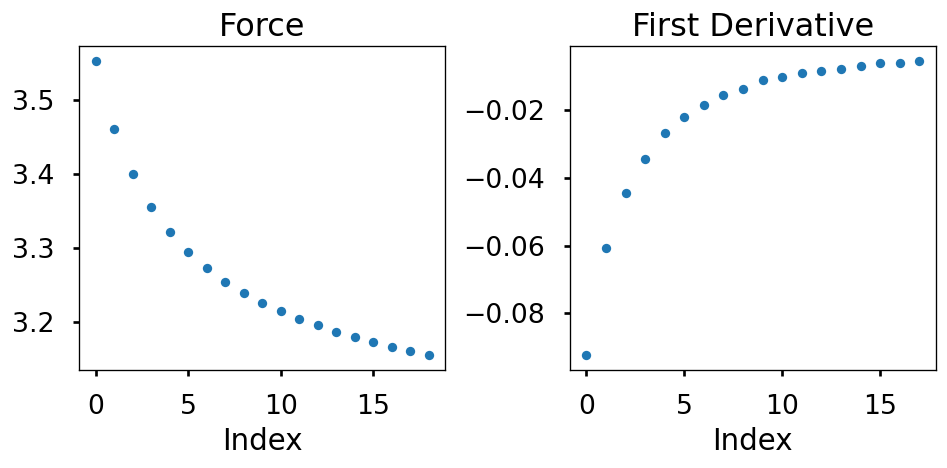

In [266]:
# height_gap = np.arange(2,20+1,1) #[nm]
dir_1 = 'capsol/grid_500_4/'
dir_2 = 'capsol/grid_500_3/'

force_1 = [0.0]*len(height_gap)
force_2 = [0.0]*len(height_gap)
for i in range(len(height_gap)):
    s = height_gap[i]/20
    file_name = 'Fz.dat{0:1.4f}'.format(s)
    data = np.genfromtxt(dir_1+file_name,skip_header=1,usecols=(0,3,1))
    force_1[i] = data[-1,-1]
    
    data = np.genfromtxt(dir_2+file_name,skip_header=1,usecols=(0,3,1))
    force_2[i] = data[-1,-1]

fig,ax = plt.subplots(1,2,figsize=(8,4),dpi=120)
axes = ax.ravel()
# ax.plot(offset_tip,force,'.')
# ax.plot(offset_tip,force2,'.')
# ax.plot(offset_tip,force3,'.')
# axes[0].plot(np.diff(force_1,n=0),'.')
# axes[0].plot(np.diff(force_2,n=0),'.')
axes[0].plot(np.diff(force,n=0),'.')
axes[0].set_xlabel('Index')
axes[0].set_title('Force')

# axes[1].plot(np.diff(force_1,n=1),'.')
# axes[1].plot(np.diff(force_2,n=1),'.')
axes[1].plot(np.diff(force,n=1),'.')
axes[1].set_xlabel('Index')
axes[1].set_title('First Derivative')

plt.tight_layout()
plt.show()

capsol/test4_s2.0nm
Reading capsol/test4_s2.0nm.1.node
Reading capsol/test4_s2.0nm.1.ele
Reading capsol/test4_s2.0nm.1.edge
THE NUMBER OF NODES IS: 427353
THE NUMBER OF ELEMENTS IS: 810978
THE NUMBER OF EDGES IS: 1217972
node_flags [ 0  1  2  3  4 11 12 14]
elem_flags [1 2 3]
edge_flags [ 0  1  2  3  4 11 12 14]



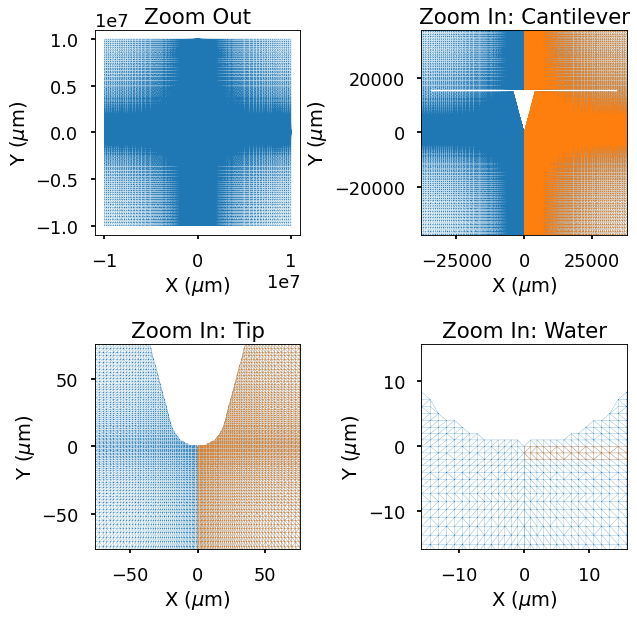

In [271]:
import numpy as np
from scipy.interpolate import interp1d

from lib.mesh import Mesh,Probe,generate_grid
from lib.materials import Consts,PDE
from lib.assembly import FEM
from lib.utils import print_tstamp

#===============================================================================
#CapSol Grid
inparg = {'n':500,'m':500,'l_js':350, #number of grids: x,z+,z- below sample top
          'h0':1,'rho_max':10e6,'z_max':10e6, #resolution: h0, box_size (rho_max,z_max)
          'd_min':2,'d_max':20,'id_step':1, #tip-sample separation: min,max,istep (stepsize=istep*h0)
          'eps_r':5.9,'Hsam':10e6} #sample: eps_r, thickness_sample
x,y = generate_grid(**inparg)

#Probe Geometry
probe = Probe(
    #geometry of the background slab
    radius_air = 10e6, #radius of the air
    height_air = 10e6, #height of the air
    height_gap = 20.0, #gap between tip apex and sample surface [nm]
    height_water = 1.0, #thickness of thin water film
    height_solid = 10e6, #height of the solid

    #geometry of the cantilever probe
    radius_tip = 20, #radius of probe tip [nm]
    radius_cone = 15e3*np.tan(15/180*np.pi)+20, #radius of probe cone [nm]
    height_cone = 15e3+20, #height of probe cone [nm]
    radius_disk = 35e3, #radius of probe disk [nm]
    height_disk = 0.5e3, #height of probe disk [nm]

    #area constraints
    area_air = 1e12, #[nm]**2
    area_water = 1e12, #[nm]**2
    area_solid = 1e12, #[nm]**2

    #mesh construction parameters
    mesh_prefix = 'test',
    mesh_grid = [x,y],
    dist_factor = 1.0,
    build_mesh = False,
    )

height_gap = np.arange(2,21,1)
for i in range(1):
    mesh_prefix = 'capsol/test4_s{:02.1f}nm'.format(height_gap[i])
    print(mesh_prefix)

    #update grid discretization
    inparg['d_min'] = height_gap[i]
    x,y = generate_grid(**inparg)

    #update probe geometry and control points
    probe.height_gap = height_gap[i]
    probe.mesh_prefix = mesh_prefix
    probe.mesh_grid = [x,y]
    
    probe.triplot(xunit='nm',yunit='nm')


## Benchmark force using previous solution

In [274]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

import numpy as np
from lib.mesh import Mesh,Probe,generate_grid
from lib.materials import Consts,PDE
from lib.assembly import FEM
from lib.utils import print_tstamp

inparg = {'n':500,'m':500,'l_js':350, #number of grids: x,z+,z- below sample top
          'h0':1,'rho_max':10e6,'z_max':10e6, #resolution: h0, box_size (rho_max,z_max)
          'd_min':2,'d_max':20,'id_step':1, #tip-sample separation: min,max,istep (stepsize=istep*h0)
          'eps_r':5.9,'Hsam':10e6} #sample: eps_r, thickness_sample
x,y = generate_grid(**inparg)

#Probe Geometry
probe = Probe(
    #geometry of the background slab
    radius_air = 50e3, #radius of the air
    height_air = 50e3, #height of the air
    height_gap = 20.0, #gap between tip apex and sample surface [nm]
    height_water = 1.0, #thickness of thin water film
    height_solid = 50e3, #height of the solid

    #geometry of the cantilever probe
    radius_tip = 20, #radius of probe tip [nm]
    radius_cone = 15e3*np.tan(15/180*np.pi)+20, #radius of probe cone [nm]
    height_cone = 15e3+20, #height of probe cone [nm]
    radius_disk = 35e3, #radius of probe disk [nm]
    height_disk = 0.5e3, #height of probe disk [nm]

    #area constraints
    area_air = 1e12, #[nm]**2
    area_water = 1e12, #[nm]**2
    area_solid = 1e12, #[nm]**2

    #mesh construction parameters
    mesh_prefix = 'test',
    mesh_grid = [x,y],
    dist_factor = 1.0,
    build_mesh = False,
    )

height_gap = np.arange(2,21,1)
force_ref = np.zeros(len(height_gap))
for i in range(len(height_gap)):
    #update grid discretization
    inparg['d_min'] = height_gap[i]
    x,y = generate_grid(**inparg)
    x = x[x<=probe.radius_air]
    y = y[(y>=-probe.height_solid-probe.height_gap)&(y<=probe.height_air)]

    mesh_prefix = 'capsol/test3_s{:02.1f}nm'.format(height_gap[i])
    print(mesh_prefix)
    stat = FEM.load(mesh_prefix)
    stat.mesh.grid_x = x
    stat.mesh.grid_y = y
    f_out = stat.mesh.force2d(stat.sol)
    force_ref[i] = np.sum(f_out[:,2])
    print('i',i,'force',force_ref[i])

capsol/test3_s2.0nm
i 0 force 3.5672161200047303
capsol/test3_s3.0nm
i 1 force 3.4717617673642565
capsol/test3_s4.0nm
i 2 force 3.4098853263404445
capsol/test3_s5.0nm
i 3 force 3.3919111697599744
capsol/test3_s6.0nm
i 4 force 3.345827480054367
capsol/test3_s7.0nm
i 5 force 3.329763443134291
capsol/test3_s8.0nm
i 6 force 3.313111515858499
capsol/test3_s9.0nm
i 7 force 3.299112491453726
capsol/test3_s10.0nm
i 8 force 3.2838403713437083
capsol/test3_s11.0nm
i 9 force 3.264632677241042
capsol/test3_s12.0nm
i 10 force 3.2509287455517053
capsol/test3_s13.0nm
i 11 force 3.2105664241569927
capsol/test3_s14.0nm
i 12 force 3.2192086835490095
capsol/test3_s15.0nm
i 13 force 3.1905347912382487
capsol/test3_s16.0nm
i 14 force 3.2158022383049163
capsol/test3_s17.0nm
i 15 force 3.1657949449301217
capsol/test3_s18.0nm
i 16 force 3.1561604740363443
capsol/test3_s19.0nm
i 17 force 3.1594484708424613
capsol/test3_s20.0nm
i 18 force 3.155861670478


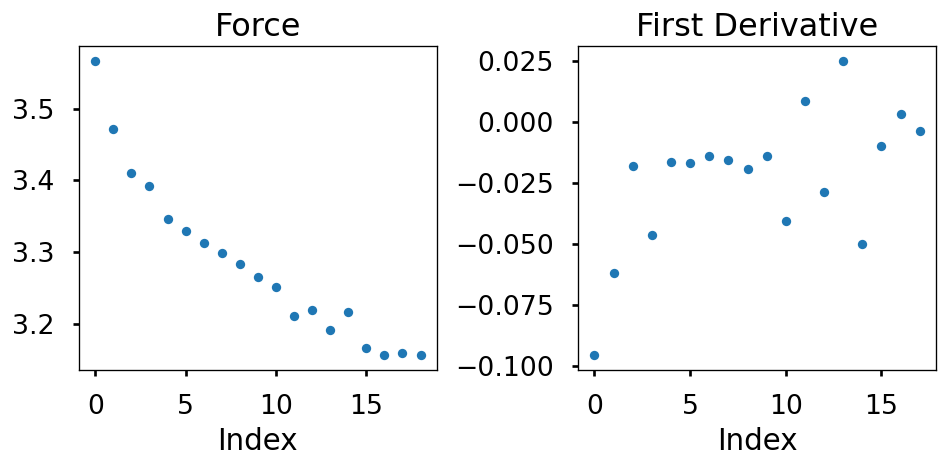

In [275]:
# height_gap = np.arange(2,20+1,1) #[nm]
dir_1 = 'capsol/grid_500_4/'
dir_2 = 'capsol/grid_500_3/'

force_1 = [0.0]*len(height_gap)
force_2 = [0.0]*len(height_gap)
for i in range(len(height_gap)):
    s = height_gap[i]/20
    file_name = 'Fz.dat{0:1.4f}'.format(s)
    data = np.genfromtxt(dir_1+file_name,skip_header=1,usecols=(0,3,1))
    force_1[i] = data[-1,-1]
    
    data = np.genfromtxt(dir_2+file_name,skip_header=1,usecols=(0,3,1))
    force_2[i] = data[-1,-1]

fig,ax = plt.subplots(1,2,figsize=(8,4),dpi=120)
axes = ax.ravel()
# ax.plot(offset_tip,force,'.')
# ax.plot(offset_tip,force2,'.')
# ax.plot(offset_tip,force3,'.')
# axes[0].plot(np.diff(force_1,n=0),'.')
# axes[0].plot(np.diff(force_2,n=0),'.')
axes[0].plot(np.diff(force_ref,n=0),'.')
axes[0].set_xlabel('Index')
axes[0].set_title('Force')

# axes[1].plot(np.diff(force_1,n=1),'.')
# axes[1].plot(np.diff(force_2,n=1),'.')
axes[1].plot(np.diff(force_ref,n=1),'.')
axes[1].set_xlabel('Index')
axes[1].set_title('First Derivative')

plt.tight_layout()
plt.show()

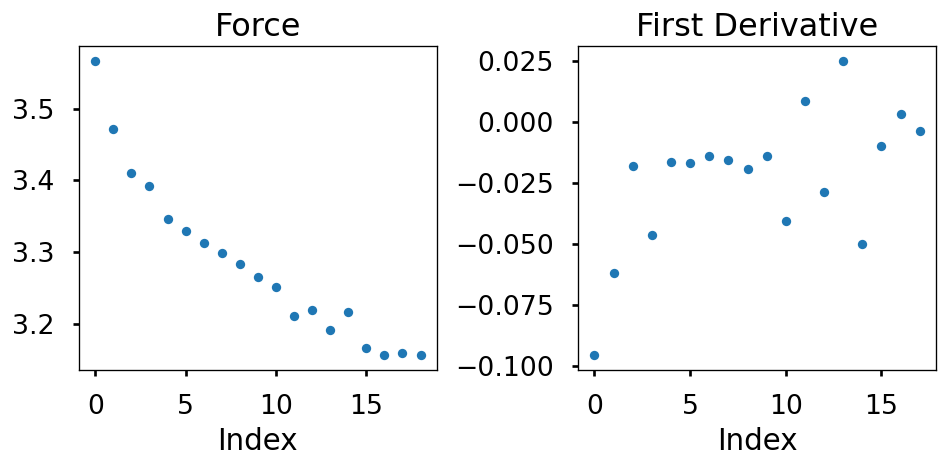

In [269]:
# height_gap = np.arange(2,20+1,1) #[nm]
dir_1 = 'capsol/grid_500_4/'
dir_2 = 'capsol/grid_500_3/'

force_1 = [0.0]*len(height_gap)
force_2 = [0.0]*len(height_gap)
for i in range(len(height_gap)):
    s = height_gap[i]/20
    file_name = 'Fz.dat{0:1.4f}'.format(s)
    data = np.genfromtxt(dir_1+file_name,skip_header=1,usecols=(0,3,1))
    force_1[i] = data[-1,-1]
    
    data = np.genfromtxt(dir_2+file_name,skip_header=1,usecols=(0,3,1))
    force_2[i] = data[-1,-1]

fig,ax = plt.subplots(1,2,figsize=(8,4),dpi=120)
axes = ax.ravel()
# ax.plot(offset_tip,force,'.')
# ax.plot(offset_tip,force2,'.')
# ax.plot(offset_tip,force3,'.')
# axes[0].plot(np.diff(force_1,n=0),'.')
# axes[0].plot(np.diff(force_2,n=0),'.')
axes[0].plot(np.diff(force_ref,n=0),'.')
axes[0].set_xlabel('Index')
axes[0].set_title('Force')

# axes[1].plot(np.diff(force_1,n=1),'.')
# axes[1].plot(np.diff(force_2,n=1),'.')
axes[1].plot(np.diff(force_ref,n=1),'.')
axes[1].set_xlabel('Index')
axes[1].set_title('First Derivative')

plt.tight_layout()
plt.show()

capsol/test3_s2.0nm
Reading capsol/test3_s2.0nm.1.node
Reading capsol/test3_s2.0nm.1.ele
Reading capsol/test3_s2.0nm.1.edge
THE NUMBER OF NODES IS: 604158
THE NUMBER OF ELEMENTS IS: 1162180
THE NUMBER OF EDGES IS: 1745979
node_flags [ 0  1  2  3  4 11 12 14]
elem_flags [1 2 3]
edge_flags [ 0  1  2  3  4 11 12 14]



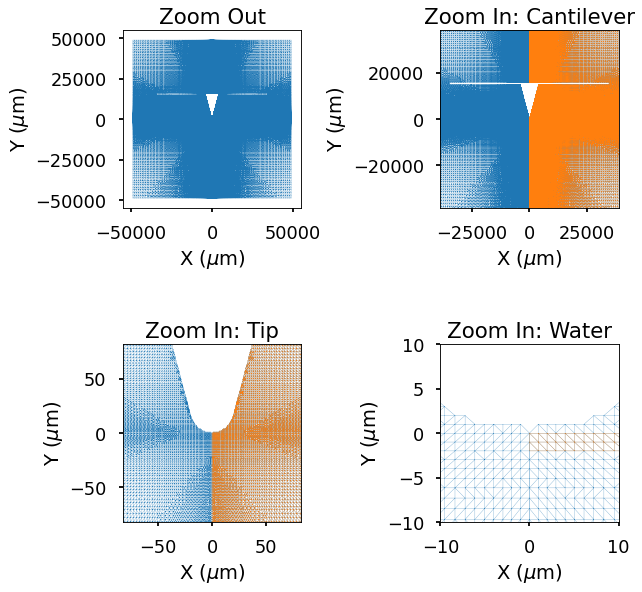

In [273]:
import numpy as np
from scipy.interpolate import interp1d

from lib.mesh import Mesh,Probe,generate_grid
from lib.materials import Consts,PDE
from lib.assembly import FEM
from lib.utils import print_tstamp

#===============================================================================
#CapSol Grid
inparg = {'n':500,'m':500,'l_js':350, #number of grids: x,z+,z- below sample top
          'h0':1,'rho_max':10e6,'z_max':10e6, #resolution: h0, box_size (rho_max,z_max)
          'd_min':2,'d_max':20,'id_step':1, #tip-sample separation: min,max,istep (stepsize=istep*h0)
          'eps_r':5.9,'Hsam':10e6} #sample: eps_r, thickness_sample
x,y = generate_grid(**inparg)

#Probe Geometry
probe = Probe(
    #geometry of the background slab
    radius_air = 50e3, #radius of the air
    height_air = 50e3, #height of the air
    height_gap = 20.0, #gap between tip apex and sample surface [nm]
    height_water = 1.0, #thickness of thin water film
    height_solid = 50e3, #height of the solid

    #geometry of the cantilever probe
    radius_tip = 20, #radius of probe tip [nm]
    radius_cone = 15e3*np.tan(15/180*np.pi)+20, #radius of probe cone [nm]
    height_cone = 15e3+20, #height of probe cone [nm]
    radius_disk = 35e3, #radius of probe disk [nm]
    height_disk = 0.5e3, #height of probe disk [nm]

    #area constraints
    area_air = 1e12, #[nm]**2
    area_water = 1e12, #[nm]**2
    area_solid = 1e12, #[nm]**2

    #mesh construction parameters
    mesh_prefix = 'test',
    mesh_grid = [x,y],
    dist_factor = 1.0,
    build_mesh = False,
    )

height_gap = np.arange(2,21,1)
for i in range(1):
    mesh_prefix = 'capsol/test3_s{:02.1f}nm'.format(height_gap[i])
    print(mesh_prefix)

    #update grid discretization
    inparg['d_min'] = height_gap[i]
    x,y = generate_grid(**inparg)
    x = x[x<=probe.radius_air]
    y = y[(y>=-probe.height_solid-probe.height_gap)&(y<=probe.height_air)]
    
    #update probe geometry and control points
    probe.height_gap = height_gap[i]
    probe.mesh_prefix = mesh_prefix
    probe.mesh_grid = [x,y]
    
    probe.triplot(xunit='nm',yunit='nm')
